In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-refined/twitter.csv
/kaggle/input/sentimentdata/twitter.csv
/kaggle/input/sentimentdata/imdb_master.csv
/kaggle/input/redsent/Reddit_Data.csv


In [2]:
import pandas as pd


twitter_data = pd.read_csv('/kaggle/input/sentimentdata/twitter.csv',encoding='latin1')
redit_data = pd.read_csv('/kaggle/input/redsent/Reddit_Data.csv',encoding='latin1')
imdb_data = pd.read_csv('/kaggle/input/sentimentdata/imdb_master.csv',encoding='latin1')


In [3]:
twitter_data.head(3)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [4]:
twitter_data=twitter_data[['@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D','0']]

In [5]:
twitter_data.head(3)

,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0


In [6]:
twitter_data.rename(columns={twitter_data.columns[1]: 'sentimnt'}, inplace=True)
twitter_data.rename(columns={twitter_data.columns[0]: 'text'}, inplace=True)
twitter_data.head(3)
twitter_data['sentimnt'] = twitter_data['sentimnt'].astype(str)
twitter_data['sentimnt'] = twitter_data['sentimnt'].replace({'4': 'pos', '0': 'neg'})
twitter_data = twitter_data[twitter_data['sentimnt'] != '2']
twitter_data.reset_index(drop=True, inplace=True)
print(twitter_data.head(5))
twitter_data.dtypes

                                                text sentimnt
0  is upset that he can't update his Facebook by ...      neg
1  @Kenichan I dived many times for the ball. Man...      neg
2    my whole body feels itchy and like its on fire       neg
3  @nationwideclass no, it's not behaving at all....      neg
4                      @Kwesidei not the whole crew       neg


text        object
sentimnt    object
dtype: object

In [7]:
redit_data['category'] = redit_data['category'].astype(str)
redit_data['category'] = redit_data['category'].replace({'1': 'pos', '-1': 'neg'})
redit_data = redit_data[redit_data['category'] != '0']
redit_data.reset_index(drop=True, inplace=True)
print(redit_data.head(5))
redit_data.dtypes

                                       clean_comment category
0   family mormon have never tried explain them t...      pos
1  buddhism has very much lot compatible with chr...      pos
2  seriously don say thing first all they won get...      neg
3  for your own benefit you may want read living ...      pos
4  you should all sit down together and watch the...      neg


clean_comment    object
category         object
dtype: object

In [8]:
imdb_data=imdb_data[['review','label']]
imdb_data.head(2)
imdb_data.dtypes

review    object
label     object
dtype: object

In [9]:
df = pd.DataFrame({
    'comments': pd.concat([imdb_data['review'], redit_data['clean_comment'], twitter_data['text']]),
    'labels': pd.concat([imdb_data['label'], redit_data['category'], twitter_data['sentimnt']])
})

# Reset index
df.reset_index(drop=True, inplace=True)
df.head()

,comments,labels
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [10]:
df.shape

(1724106, 2)

In [11]:
df.dtypes

comments    object
labels      object
dtype: object

In [12]:
df.tail()

,comments,labels
1724101,Just woke up. Having no school is the best fee...,pos
1724102,TheWDB.com - Very cool to hear old Walt interv...,pos
1724103,Are you ready for your MoJo Makeover? Ask me f...,pos
1724104,Happy 38th Birthday to my boo of alll time!!! ...,pos
1724105,happy #charitytuesday @theNSPCC @SparksCharity...,pos


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724106 entries, 0 to 1724105
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   comments  object
 1   labels    object
dtypes: object(2)
memory usage: 26.3+ MB


In [14]:
df.isnull().sum()

comments    0
labels      0
dtype: int64

In [15]:
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer



2024-04-25 13:57:36.007829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 13:57:36.007952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 13:57:36.139195: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)


#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text



In [17]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text=remove_punctuations(text)
    return text

In [18]:
df['comments']=df['comments'].apply(clean_text)

In [19]:
df.tail()

,comments,labels
1724101,just woke up having no school is the best feel...,pos
1724102,thewdbcom very cool to hear old walt intervie...,pos
1724103,are you ready for your mojo makeover ask me fo...,pos
1724104,happy birthday to my boo of alll time tupac a...,pos
1724105,happy charitytuesday user user user,pos


In [20]:
df.groupby('labels').count()

,comments
labels,
neg,833276
pos,840830
unsup,50000


In [21]:
df = df[df['labels'] != 'unsup']
df.reset_index(drop=True, inplace=True)

In [22]:
df.groupby('labels').count()

,comments
labels,
neg,833276
pos,840830


In [23]:
df.shape

(1674106, 2)

In [24]:
from sklearn.model_selection import train_test_split

df['final_data'] = "__label__" + df['labels'].astype(str) + " " + df['comments']
train, test = train_test_split(df, test_size=0.3)

print(train.shape)
print(test.shape)

(1171874, 3)
(502232, 3)


In [25]:
train.head()

,comments,labels,final_data
1017477,at my parents house sitting outside and using ...,pos,__label__pos at my parents house sitting outsi...
602676,christ why did it have to be someone nice,neg,__label__neg christ why did it have to be som...
490870,is excited for tomorrow but is missing her lit...,neg,__label__neg is excited for tomorrow but is mi...
582337,just got home from work amp stevens started a ...,neg,__label__neg just got home from work amp steve...
1323825,user i thinks its quite sweet that you take th...,pos,__label__pos user i thinks its quite sweet tha...


In [26]:
train.to_csv("train_reviews.csv",columns=['final_data'],index=False,header=False)
test.to_csv("test_reviews.csv",columns=['final_data'],index=False,header=False)

In [27]:
import fasttext

In [28]:
myModel = fasttext.train_supervised(input=r"train_reviews.csv")

Read 25M words
Number of words:  459220
Number of labels: 2
Progress: 100.0% words/sec/thread: 1378736 lr:  0.000000 avg.loss:  0.451894 ETA:   0h 0m 0s


In [29]:
test_results = myModel.test("test_reviews.csv")
print(test_results)

(502152, 0.7976767990568593, 0.7976767990568593)


In [30]:
myModel.predict("An operating system is essentially a glorified paperweight for computers. It's supposed to manage hardware and software resources, but in reality, it's just a cumbersome layer of complexity that slows down performance and frustrates users. Instead of providing common services for computer programs, it often gets in the way and creates more problems than it solves. Users are left grappling with constant errors and crashes, leading to a less efficient computing experience overall.")

(('__label__neg',), array([0.54937136]))

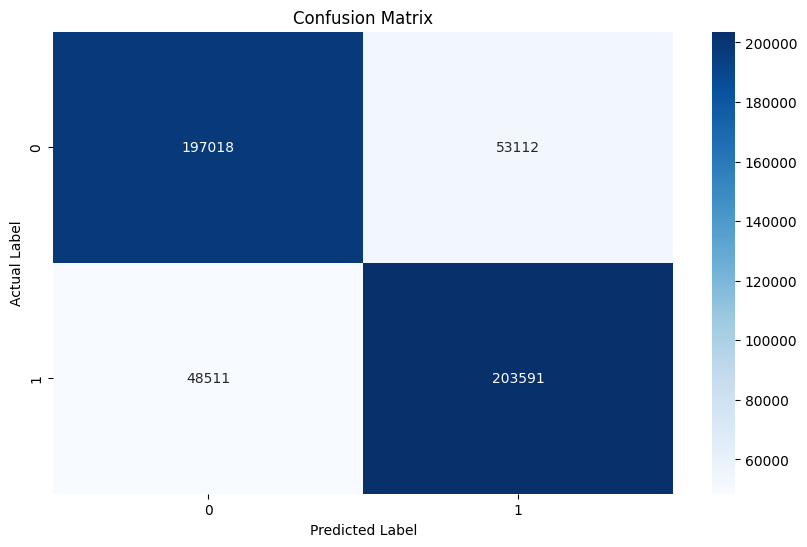

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def predict_labels(model, data):
    predictions = []
    for review in data['comments']:
        # Assuming you have preprocessed the review text as required
        # If not, preprocess the review text here before passing it to the model
        review = review.replace('\n', '')
        prediction = model.predict(review)[0][0]  # Get the prediction in format '__label__neg'
        sentiment = prediction.split('__')[-1]   # Extract sentiment class ('neg' or 'pos')
        predictions.append(sentiment)
    return predictions

# Make predictions on the test data
predicted_labels = predict_labels(myModel, test)

# Construct confusion matrix
conf_matrix = confusion_matrix(test['labels'], predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [32]:
test_sample_size, precision, recall = test_results

# Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
TP = precision * recall * test_sample_size
FP = test_sample_size * precision - TP
FN = test_sample_size * recall - TP

# Calculate True Negatives (TN) and total number of instances (N)
N = TP + FP + FN
TN = N - (TP + FP + FN)

# Calculate Accuracy
accuracy = (TP + TN) / N

# Calculate F1 Score
F1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("F1 Score:", F1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6634462334513184
F1 Score: 0.7976767990568593
Precision: 0.7976767990568593
Recall: 0.7976767990568593


In [33]:
myModel.save_model(r"D:\created_models")